In [149]:
import tensorflow.keras as keras
from tensorflow.keras import preprocessing
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
batch_size = 100
img_height = 28
img_width = 28

In [208]:
model = keras.Sequential()
model.add(keras.layers.InputLayer( input_shape=(784,28*28)))
model.add(keras.layers.Dense(28*28, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(12, activation="softmax"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

In [184]:
data = pd.read_csv("./data/da_Choncer.csv", index_col=0)
features =  data["path"]
label =  data["label"]

In [ ]:
data.to_numpy()

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(features,label, test_size=0.7, shuffle=True, stratify=label)

In [187]:
image_feature = []
counter = 0
for file in X_train:
    if counter % 1000 == 0:
        print(f"{counter} in {len(X_train)}")
    image = Image.open(file, mode="RGB")
    image_array = np.asarray(image)
    image_array = np.ndarray.flatten(image_array)
    image_feature.append(image_array)
    image.close()
    if counter ==10000:
        break

    counter = counter+1

0 in 75042


ValueError: bad mode 'RGB'

In [116]:
image_pandas = pd.DataFrame(image_feature)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,0,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,0,0,0,0,0,0,0,...,0,0,0,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75037,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
75038,255,255,255,255,255,255,255,255,0,0,...,255,255,255,255,255,255,255,255,255,255
75039,255,255,255,255,255,255,255,255,0,0,...,255,255,255,255,255,255,255,255,255,255
75040,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [127]:
image_pandas

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,0,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,0,0,0,0,0,0,0,...,0,0,0,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75037,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
75038,255,255,255,255,255,255,255,255,0,0,...,255,255,255,255,255,255,255,255,255,255
75039,255,255,255,255,255,255,255,255,0,0,...,255,255,255,255,255,255,255,255,255,255
75040,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [203]:
tmp = image_pandas.to_numpy()
tmp

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int64)

In [179]:
len(Y_train.unique())
encoder = LabelEncoder()
Y = encoder.fit_transform(Y_train)
Y

array([4, 9, 8, ..., 2, 2, 5])

In [204]:

tmp = tmp.reshape(len(Y),28*28)
tmp.shape

(75042, 784)

In [221]:
history = model.fit(
    x=tmp,
    y=Y,
    epochs=60,
    verbose=1,
    batch_size=500
)

Epoch 1/60
151/151 [==============================] - 1s 10ms/step - loss: 0.3798 - accuracy: 0.8783

<AxesSubplot:>

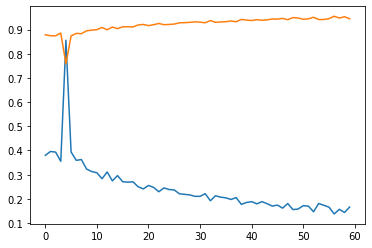

In [223]:
history_frame = pd.DataFrame(history.history)


history_frame['loss'].plot()


history_frame['accuracy'].plot()

In [224]:
model.save("././models/Digit_Recognizer")

INFO:tensorflow:Assets written to: ././models/Digit_Recognizer\assets
